Preview of Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Preview of Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Preview of Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:5

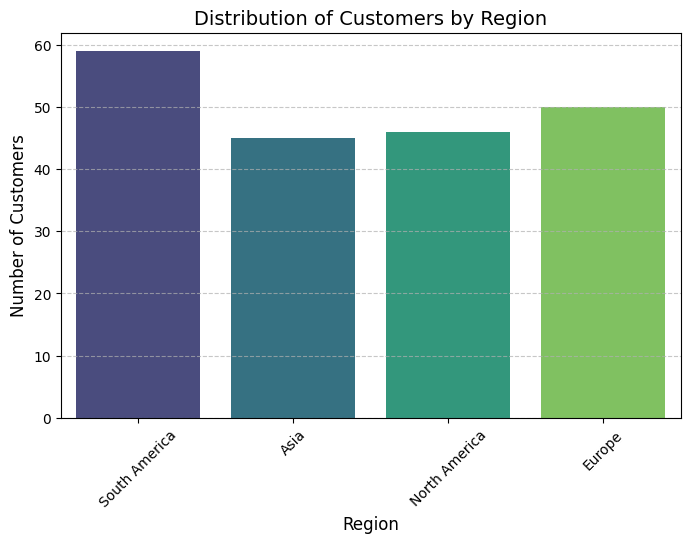

<ipython-input-6-31df1635afb1>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='coolwarm', order=products['Category'].value_counts().index)


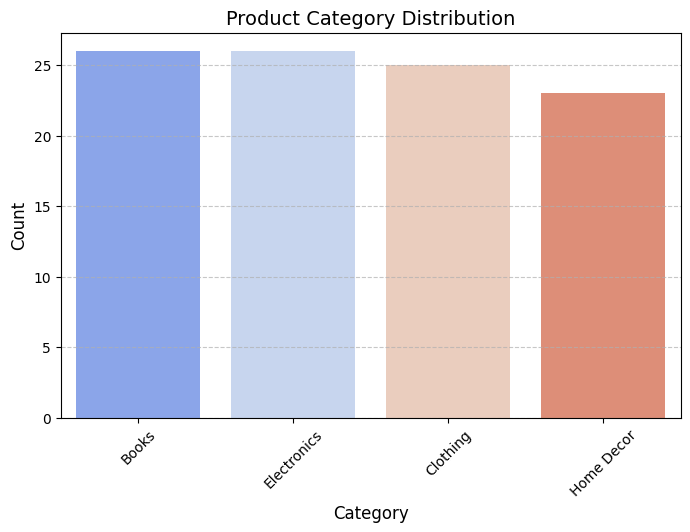

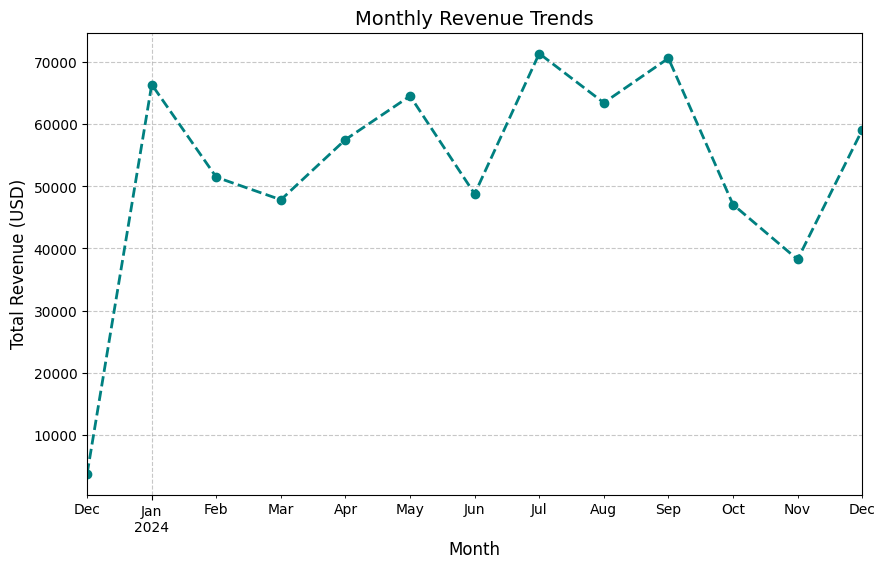

<ipython-input-6-31df1635afb1>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='magma')


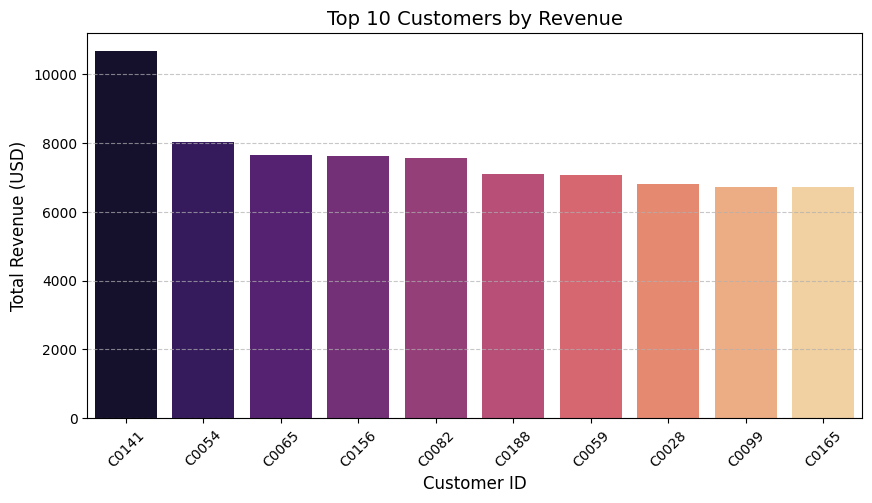

<ipython-input-6-31df1635afb1>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Category', y='TotalValue', palette='viridis')


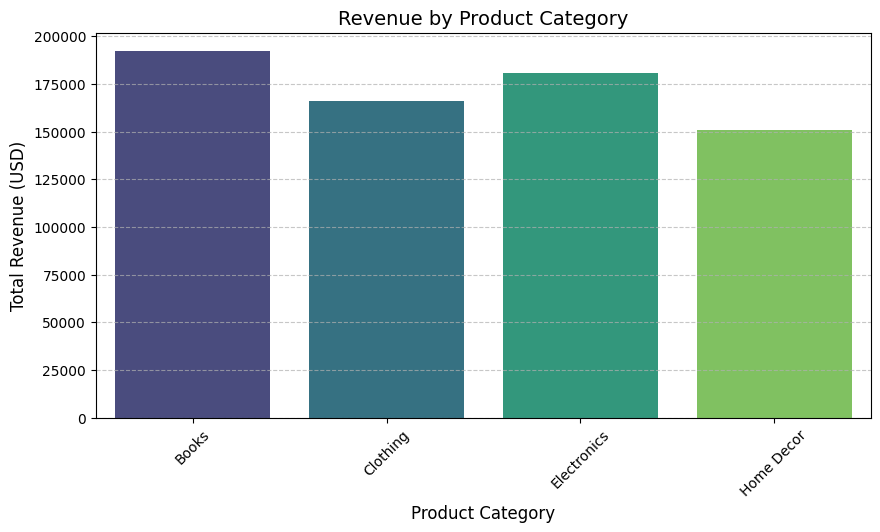

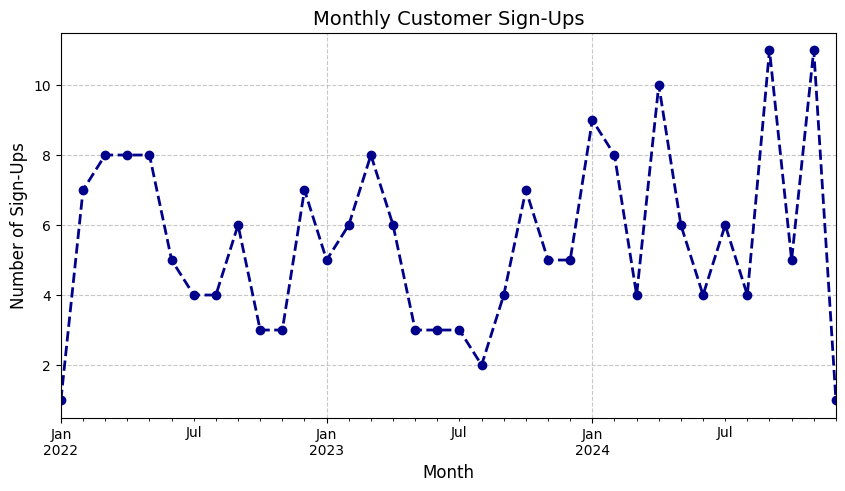

<ipython-input-6-31df1635afb1>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='magma')


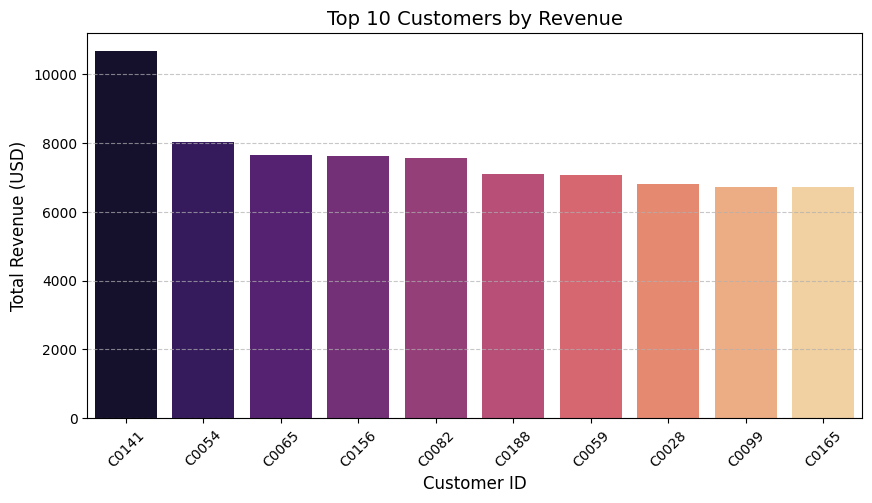

<ipython-input-6-31df1635afb1>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Category', y='TotalValue', palette='viridis')


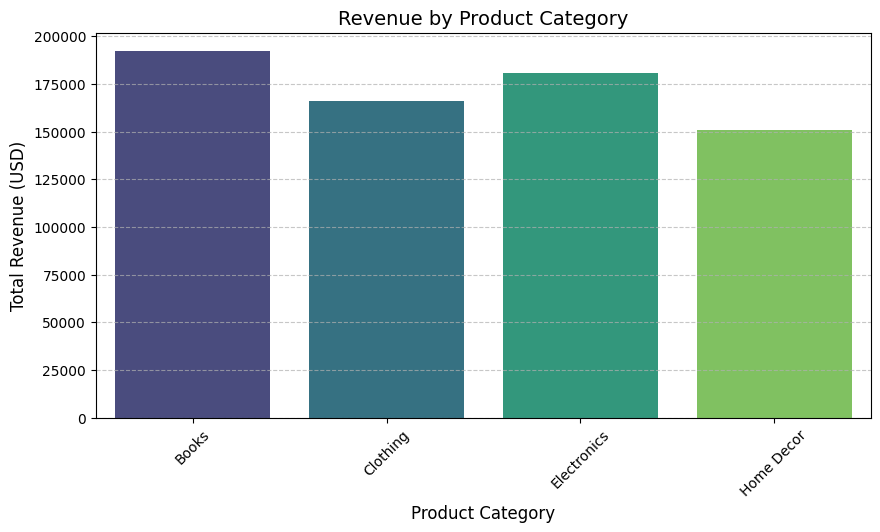

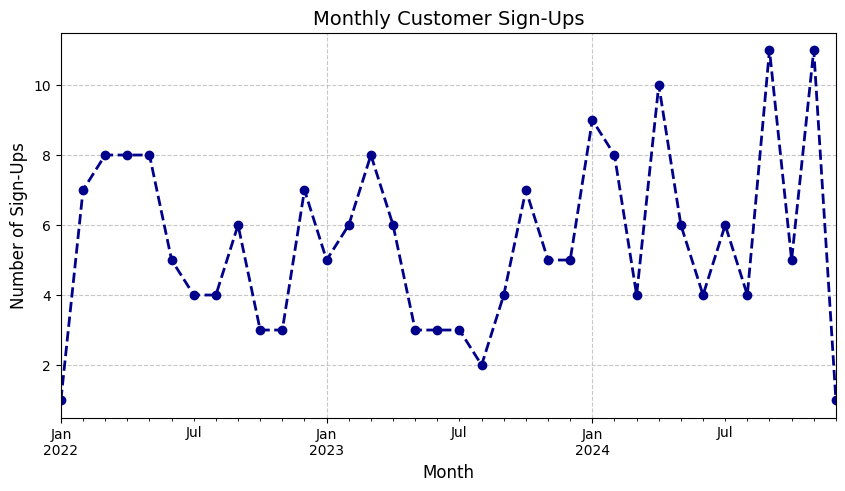

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the datasets to get an overview
print("Preview of Customers Dataset:")
print(customers.head())
print("\nPreview of Products Dataset:")
print(products.head())
print("\nPreview of Transactions Dataset:")
print(transactions.head())

# Check basic info and look for missing values in each dataset
print("\n--- Details of Customers Dataset ---")
print(customers.info())
print("\n--- Details of Products Dataset ---")
print(products.info())
print("\n--- Details of Transactions Dataset ---")
print(transactions.info())

print("\nMissing Values Check:")
print("Customers Missing Values:\n", customers.isnull().sum())
print("Products Missing Values:\n", products.isnull().sum())
print("Transactions Missing Values:\n", transactions.isnull().sum())

# Look for duplicate rows in each dataset
print("\nChecking for Duplicate Rows:")
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

# Check the number of unique values in each dataset
print("\nUnique Values in Each Dataset:")
print("Customers Unique Values:\n", customers.nunique())
print("Products Unique Values:\n", products.nunique())
print("Transactions Unique Values:\n", transactions.nunique())

# Visualizing the number of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis', hue='Region', dodge=False)
plt.title('Distribution of Customers by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizing the most popular product categories
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='coolwarm', order=products['Category'].value_counts().index)
plt.title('Product Category Distribution', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Convert TransactionDate to datetime for time-based analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Analyzing revenue trends over time
plt.figure(figsize=(10, 6))
monthly_revenue = transactions.set_index('TransactionDate').resample('MS')['TotalValue'].sum()
monthly_revenue.plot(marker='o', color='teal', linestyle='--', linewidth=2)
plt.title('Monthly Revenue Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()
# Top Customers by Revenue
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = top_customers.merge(customers, on='CustomerID')
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='magma')
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sales by Product Category
sales_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_category, x='Category', y='TotalValue', palette='viridis')
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Customer Sign-Up Trends
plt.figure(figsize=(10, 5))
signups_per_month = customers.set_index('SignupDate').resample('MS')['CustomerID'].count()

signups_per_month.plot(marker='o', color='darkblue', linestyle='--', linewidth=2)
plt.title('Monthly Customer Sign-Ups', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sign-Ups', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Data Cleaning Steps from Initial Analysis
# (already implemented)

# Additional Analysis and Visualizations:

# Top Customers by Revenue
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = top_customers.merge(customers, on='CustomerID')
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='magma')
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sales by Product Category
sales_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_category, x='Category', y='TotalValue', palette='viridis')
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Customer Sign-Up Trends
plt.figure(figsize=(10, 5))
signups_per_month = customers.set_index('SignupDate').resample('MS')['CustomerID'].count()

signups_per_month.plot(marker='o', color='darkblue', linestyle='--', linewidth=2)
plt.title('Monthly Customer Sign-Ups', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sign-Ups', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()
